<a href="https://colab.research.google.com/github/Lavishgangwani/End-to-end-WasteDetection-Using-YoloV8/blob/main/Waste_detection_using_Yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("ok")

ok


#Install Dependencies

- (Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)



In [2]:
!nvidia-smi

Fri Nov  8 08:41:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Install YOLOv8

- YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.


In [3]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8n model
model = YOLO("yolov8s.pt")

# Display model information (optional)
model.info()

YOLOv8s summary: 225 layers, 11,166,560 parameters, 0 gradients, 28.8 GFLOPs


(225, 11166560, 0, 28.816844800000002)

In [4]:
%pwd

'/content'

In [5]:
import gdown

url = 'https://drive.google.com/file/d/1ECfl3dtYyfivY8kYPq7RHUBTjC-2vf61/view?usp=share_link'

file_id = url.split('/')[-2]


prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id)
print("Data downloaded!")

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1ECfl3dtYyfivY8kYPq7RHUBTjC-2vf61
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1ECfl3dtYyfivY8kYPq7RHUBTjC-2vf61&confirm=t&uuid=25341a7d-e236-41e7-924d-0487563f3ab2
To: /content/waste-detection.zip
100%|██████████| 40.1M/40.1M [00:00<00:00, 86.3MB/s]

Data downloaded!


In [6]:
!unzip waste-detection.zip
!rm -rf waste-detection.zip
[y]

Archive:  waste-detection.zip
replace data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
# this is the YAML file  we're loading into this notebook with our data
%cat data.yaml

train: ../train/images
val: ../valid/images


nc: 13
names: ['banana', 'chilli', 'drinkcan', 'drinkpack', 'foodcan', 'lettuce', 'paperbag', 'plasticbag', 'plasticbottle', 'plasticcontainer', 'sweetpotato', 'teabag', 'tissueroll']



In [13]:
# define number of classes based on YAML
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [14]:

num_classes

'13'

In [15]:

!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 save=True

WARNING ⚠️ 'source' argument is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 38.6ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 39.4ms
Speed: 2.7ms preprocess, 39.0ms inference, 343.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


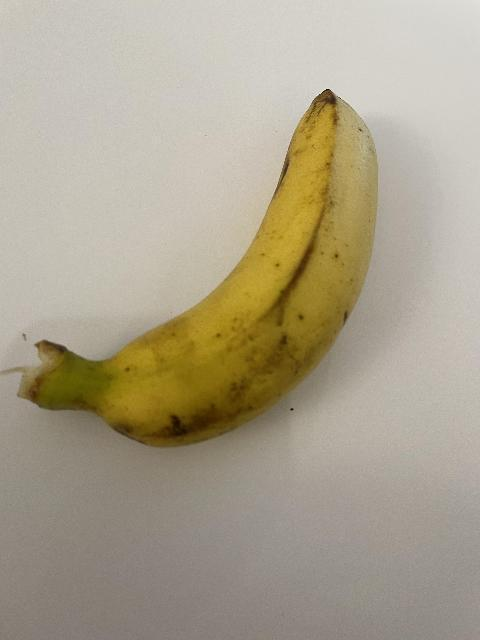

In [17]:
from ultralytics import YOLO

from IPython.display import display, Image

Image(filename='/content/train/images/Banana_10_jpg.rf.7c0536bc9eb72ec77c8f515653f44fb9.jpg', height=600)

In [18]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/train/images/Banana_10_jpg.rf.7c0536bc9eb72ec77c8f515653f44fb9.jpg'

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

image 1/1 /content/train/images/Banana_10_jpg.rf.7c0536bc9eb72ec77c8f515653f44fb9.jpg: 640x480 1 banana, 48.8ms
Speed: 2.4ms preprocess, 48.8ms inference, 584.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [21]:
!pip install roboflow

In [27]:
from roboflow import Roboflow

# Initialize Roboflow with your API key
rf = Roboflow(api_key="qtG9oyJ3xJJAaOiRi4VG")

# Access the workspaces
workspaces = rf.workspace().projects()  # This gets the list of projects in your workspace

# Print the names of the projects
for project in workspaces:
    print(project)

loading Roboflow workspace...
lavishs-cv-projects/hard-hat-sample-uj9h7
lavishs-cv-projects/waste-detection-a6dzt


In [28]:
project = rf.workspace("lavishs-cv-projects").project("waste-detection-a6dzt")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to waste-detection-1 in yolov8:: 100%|██████████| 6129/6129 [00:00<00:00, 6357.84it/s]


In [30]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [31]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/waste-detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

/content


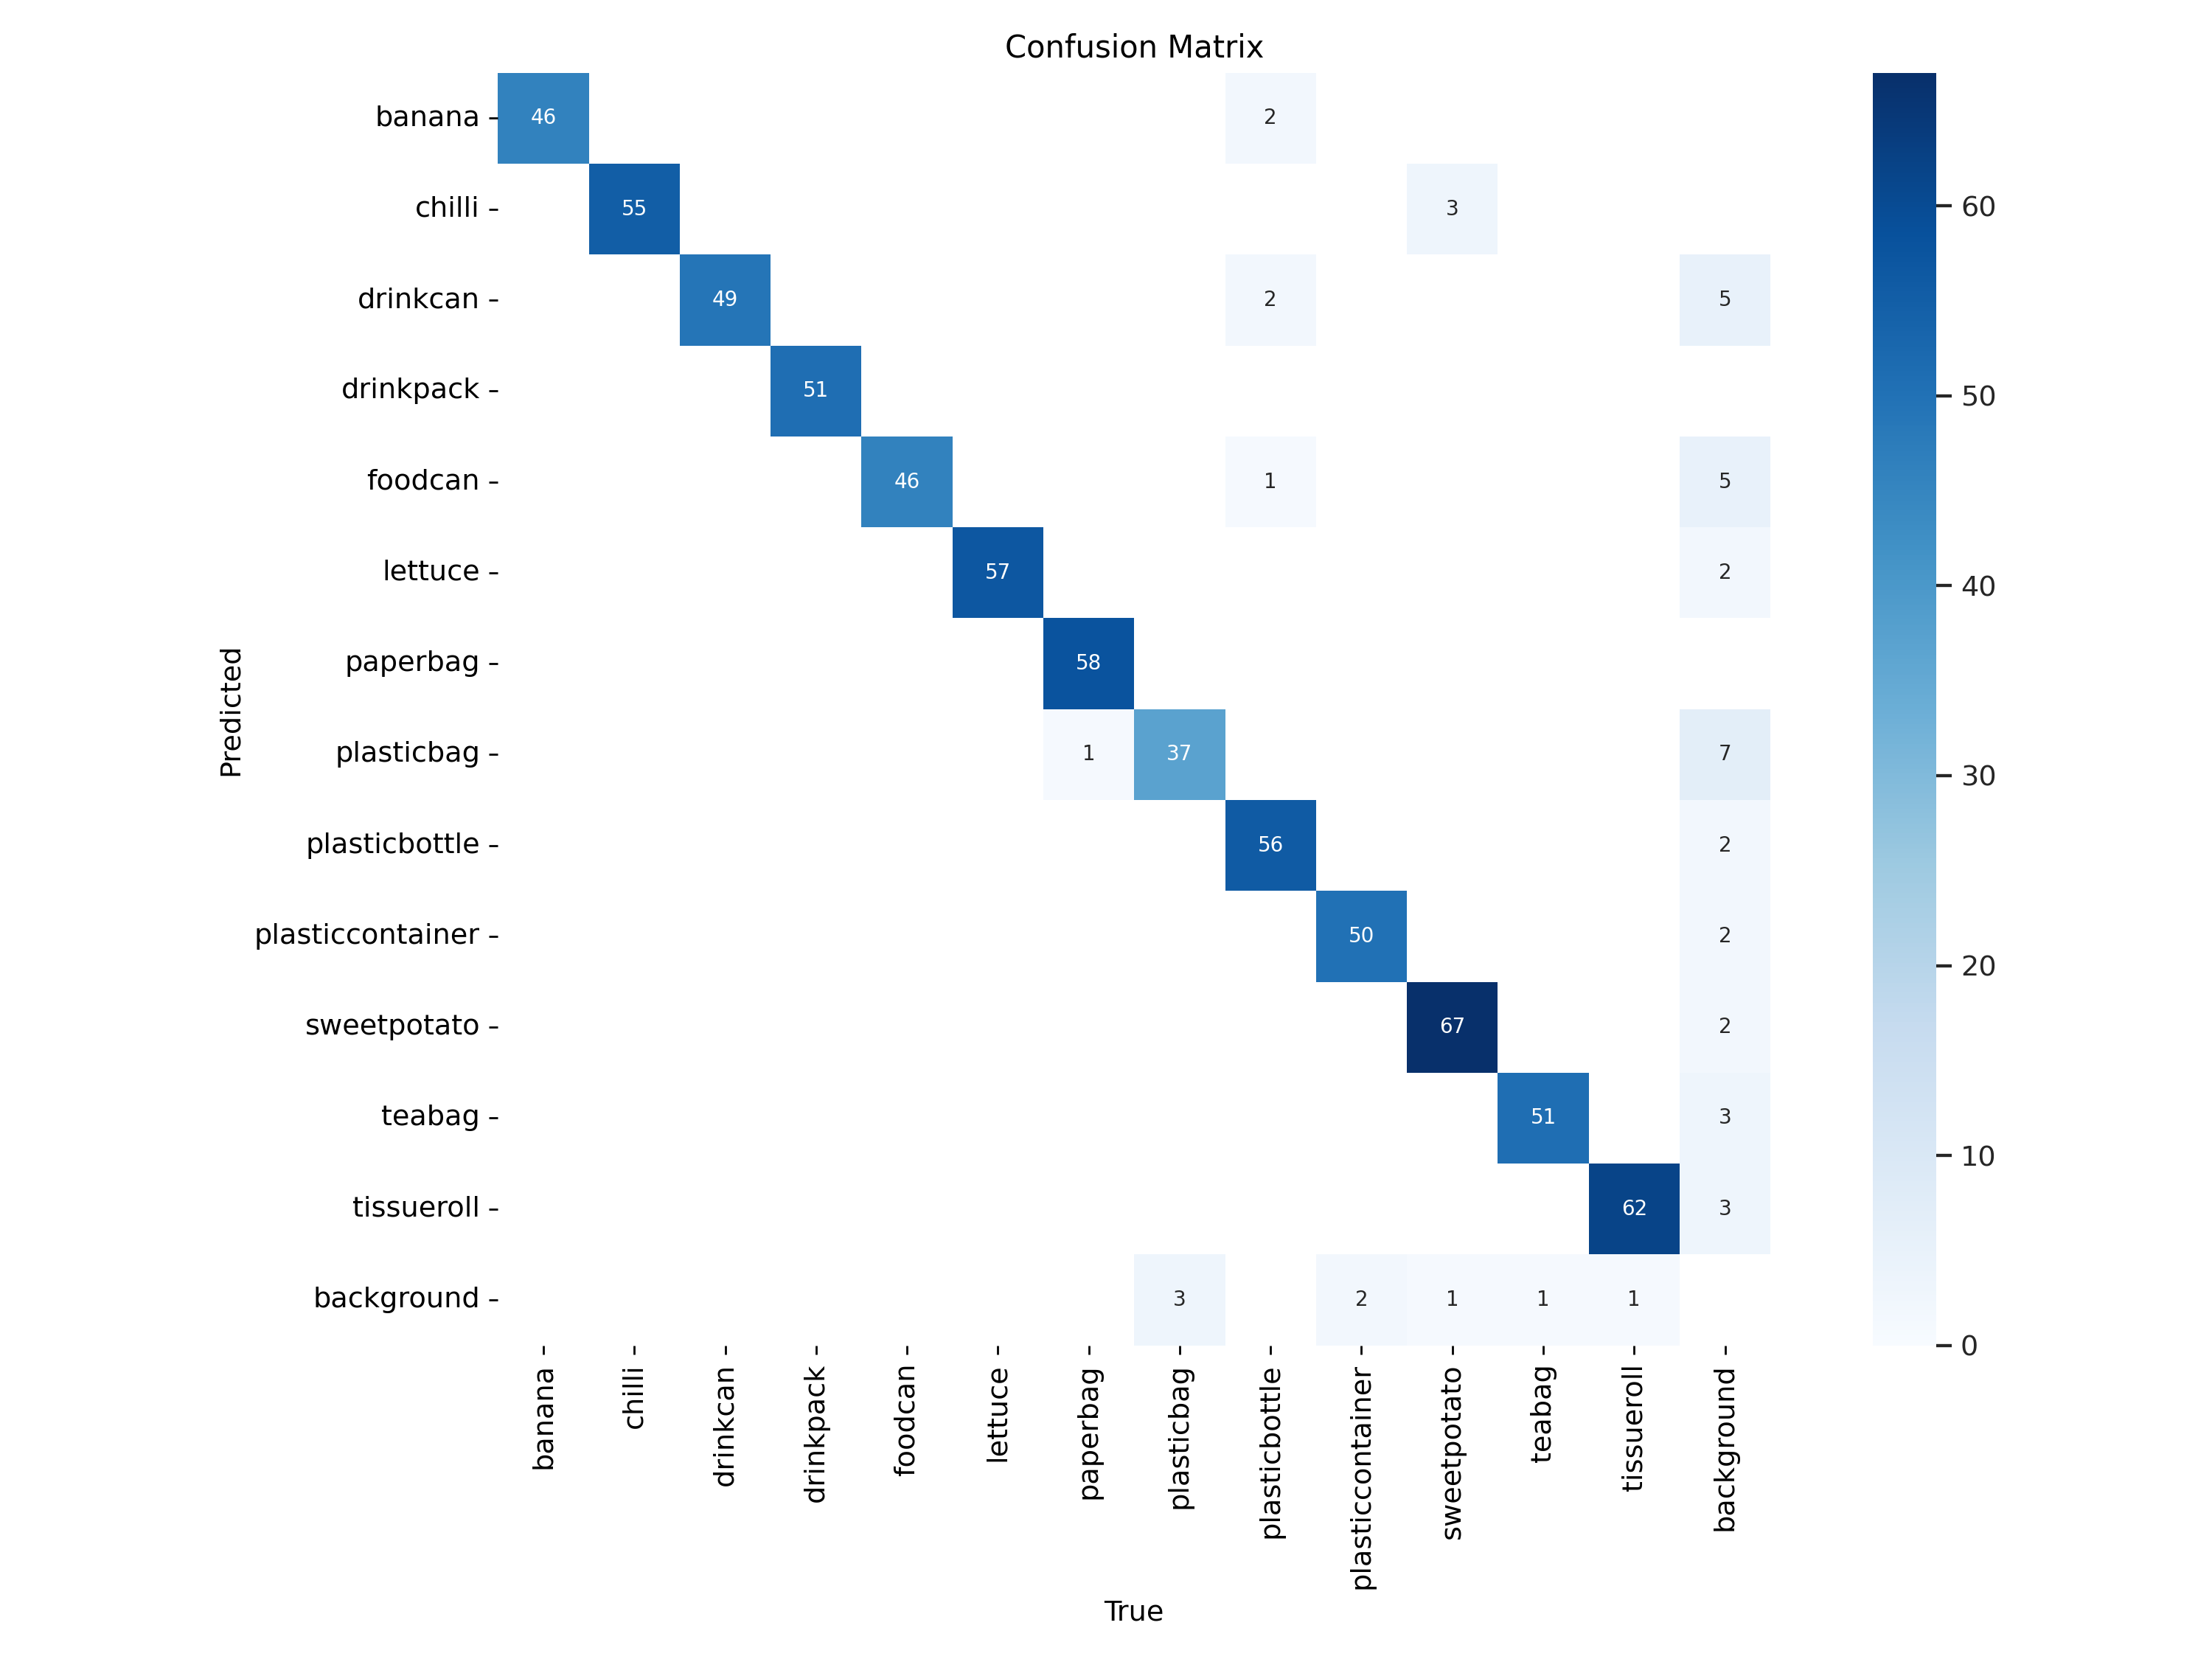

In [32]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


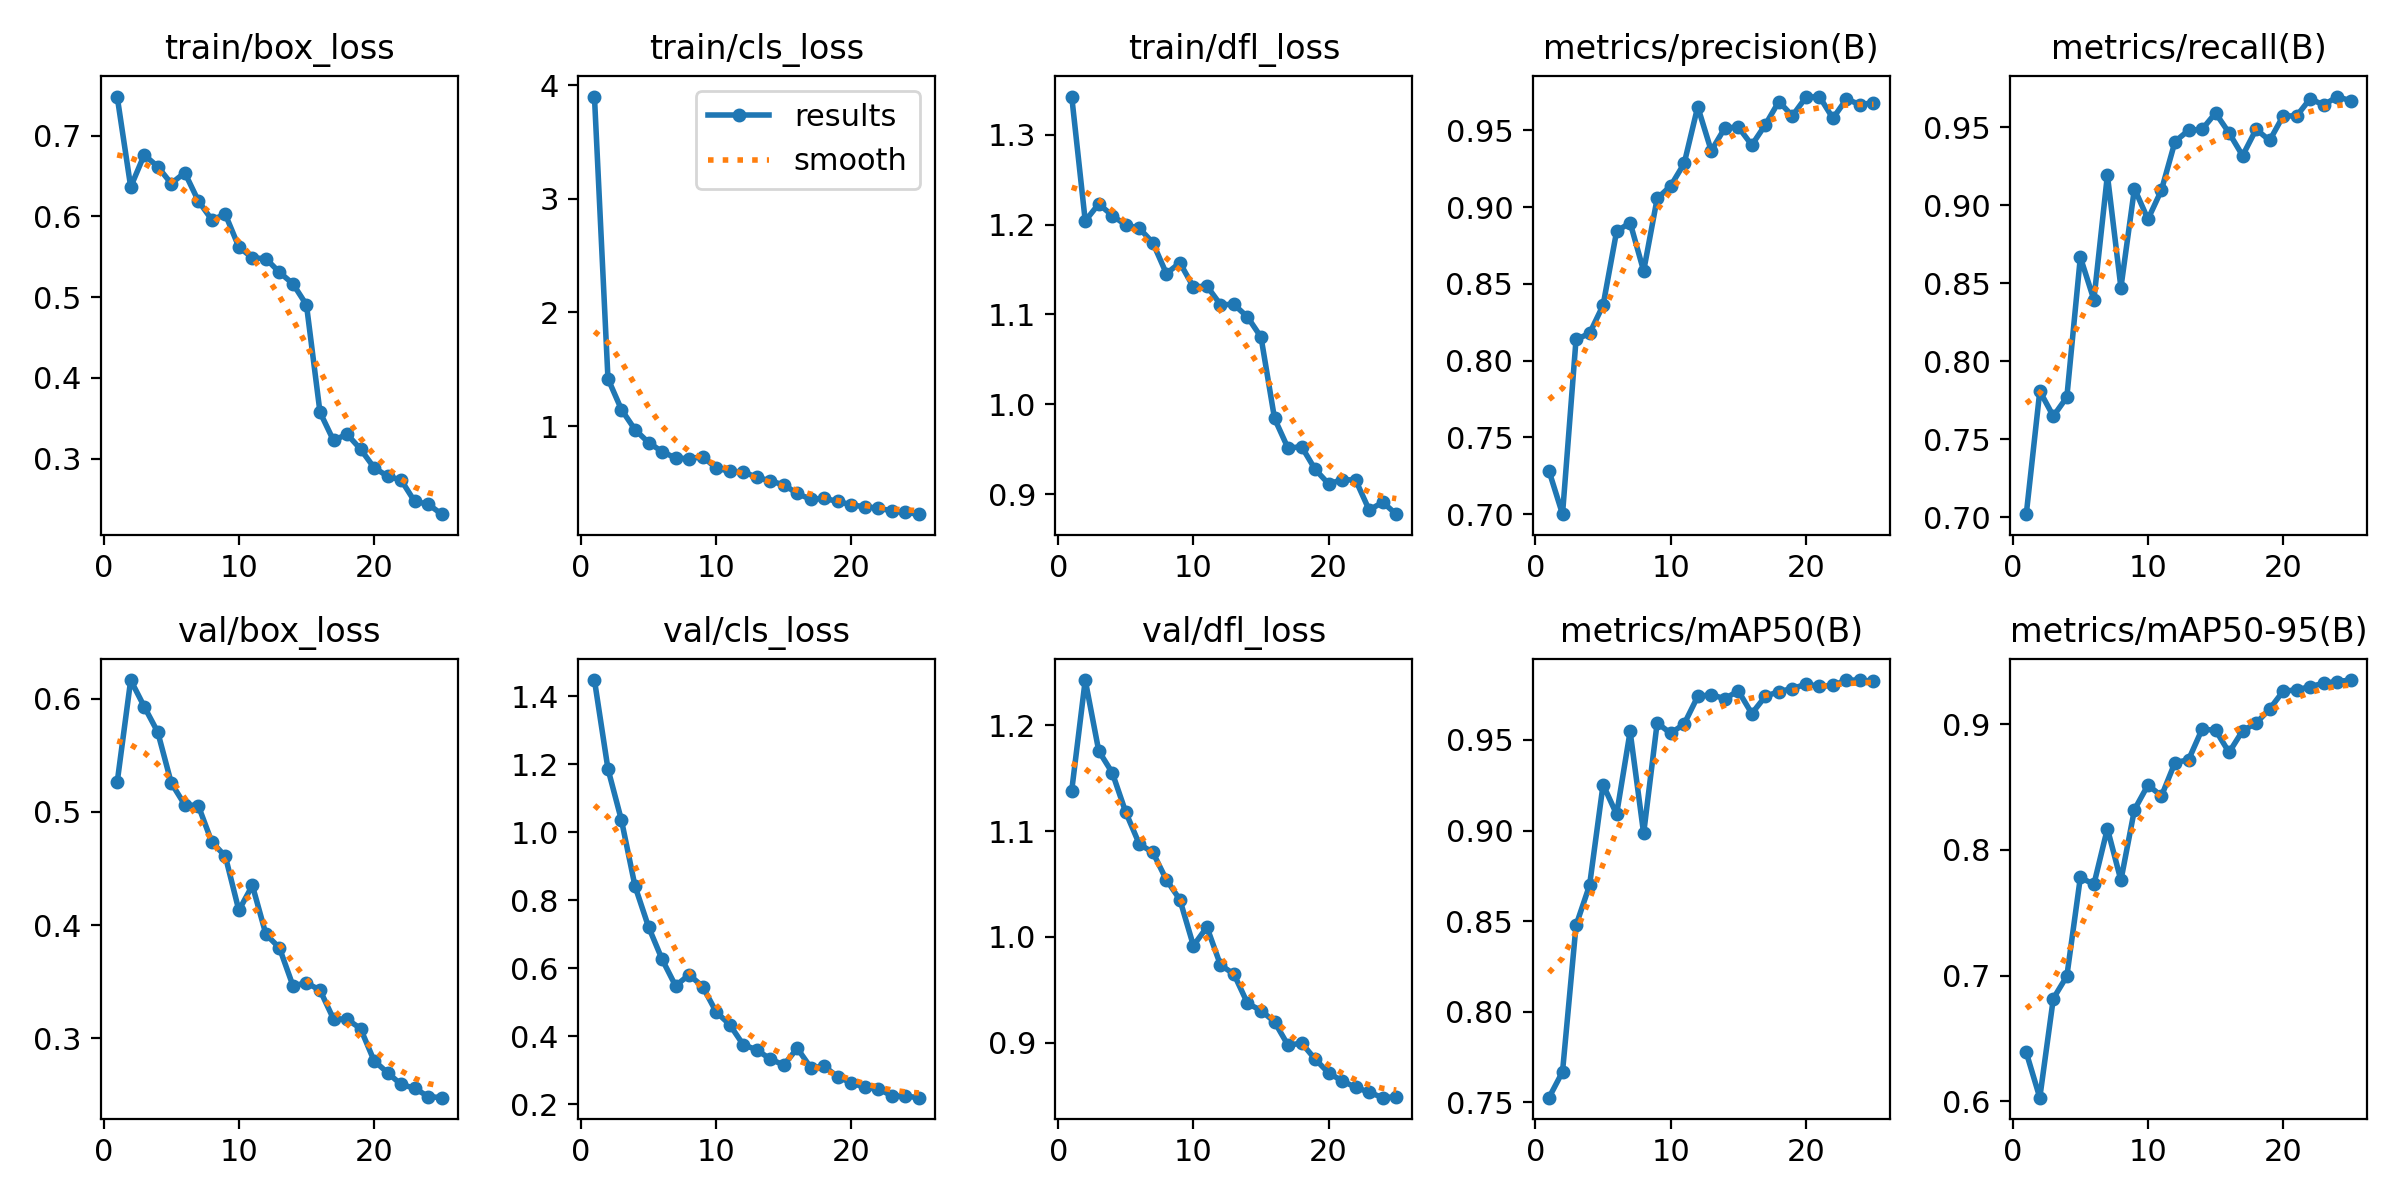

In [33]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


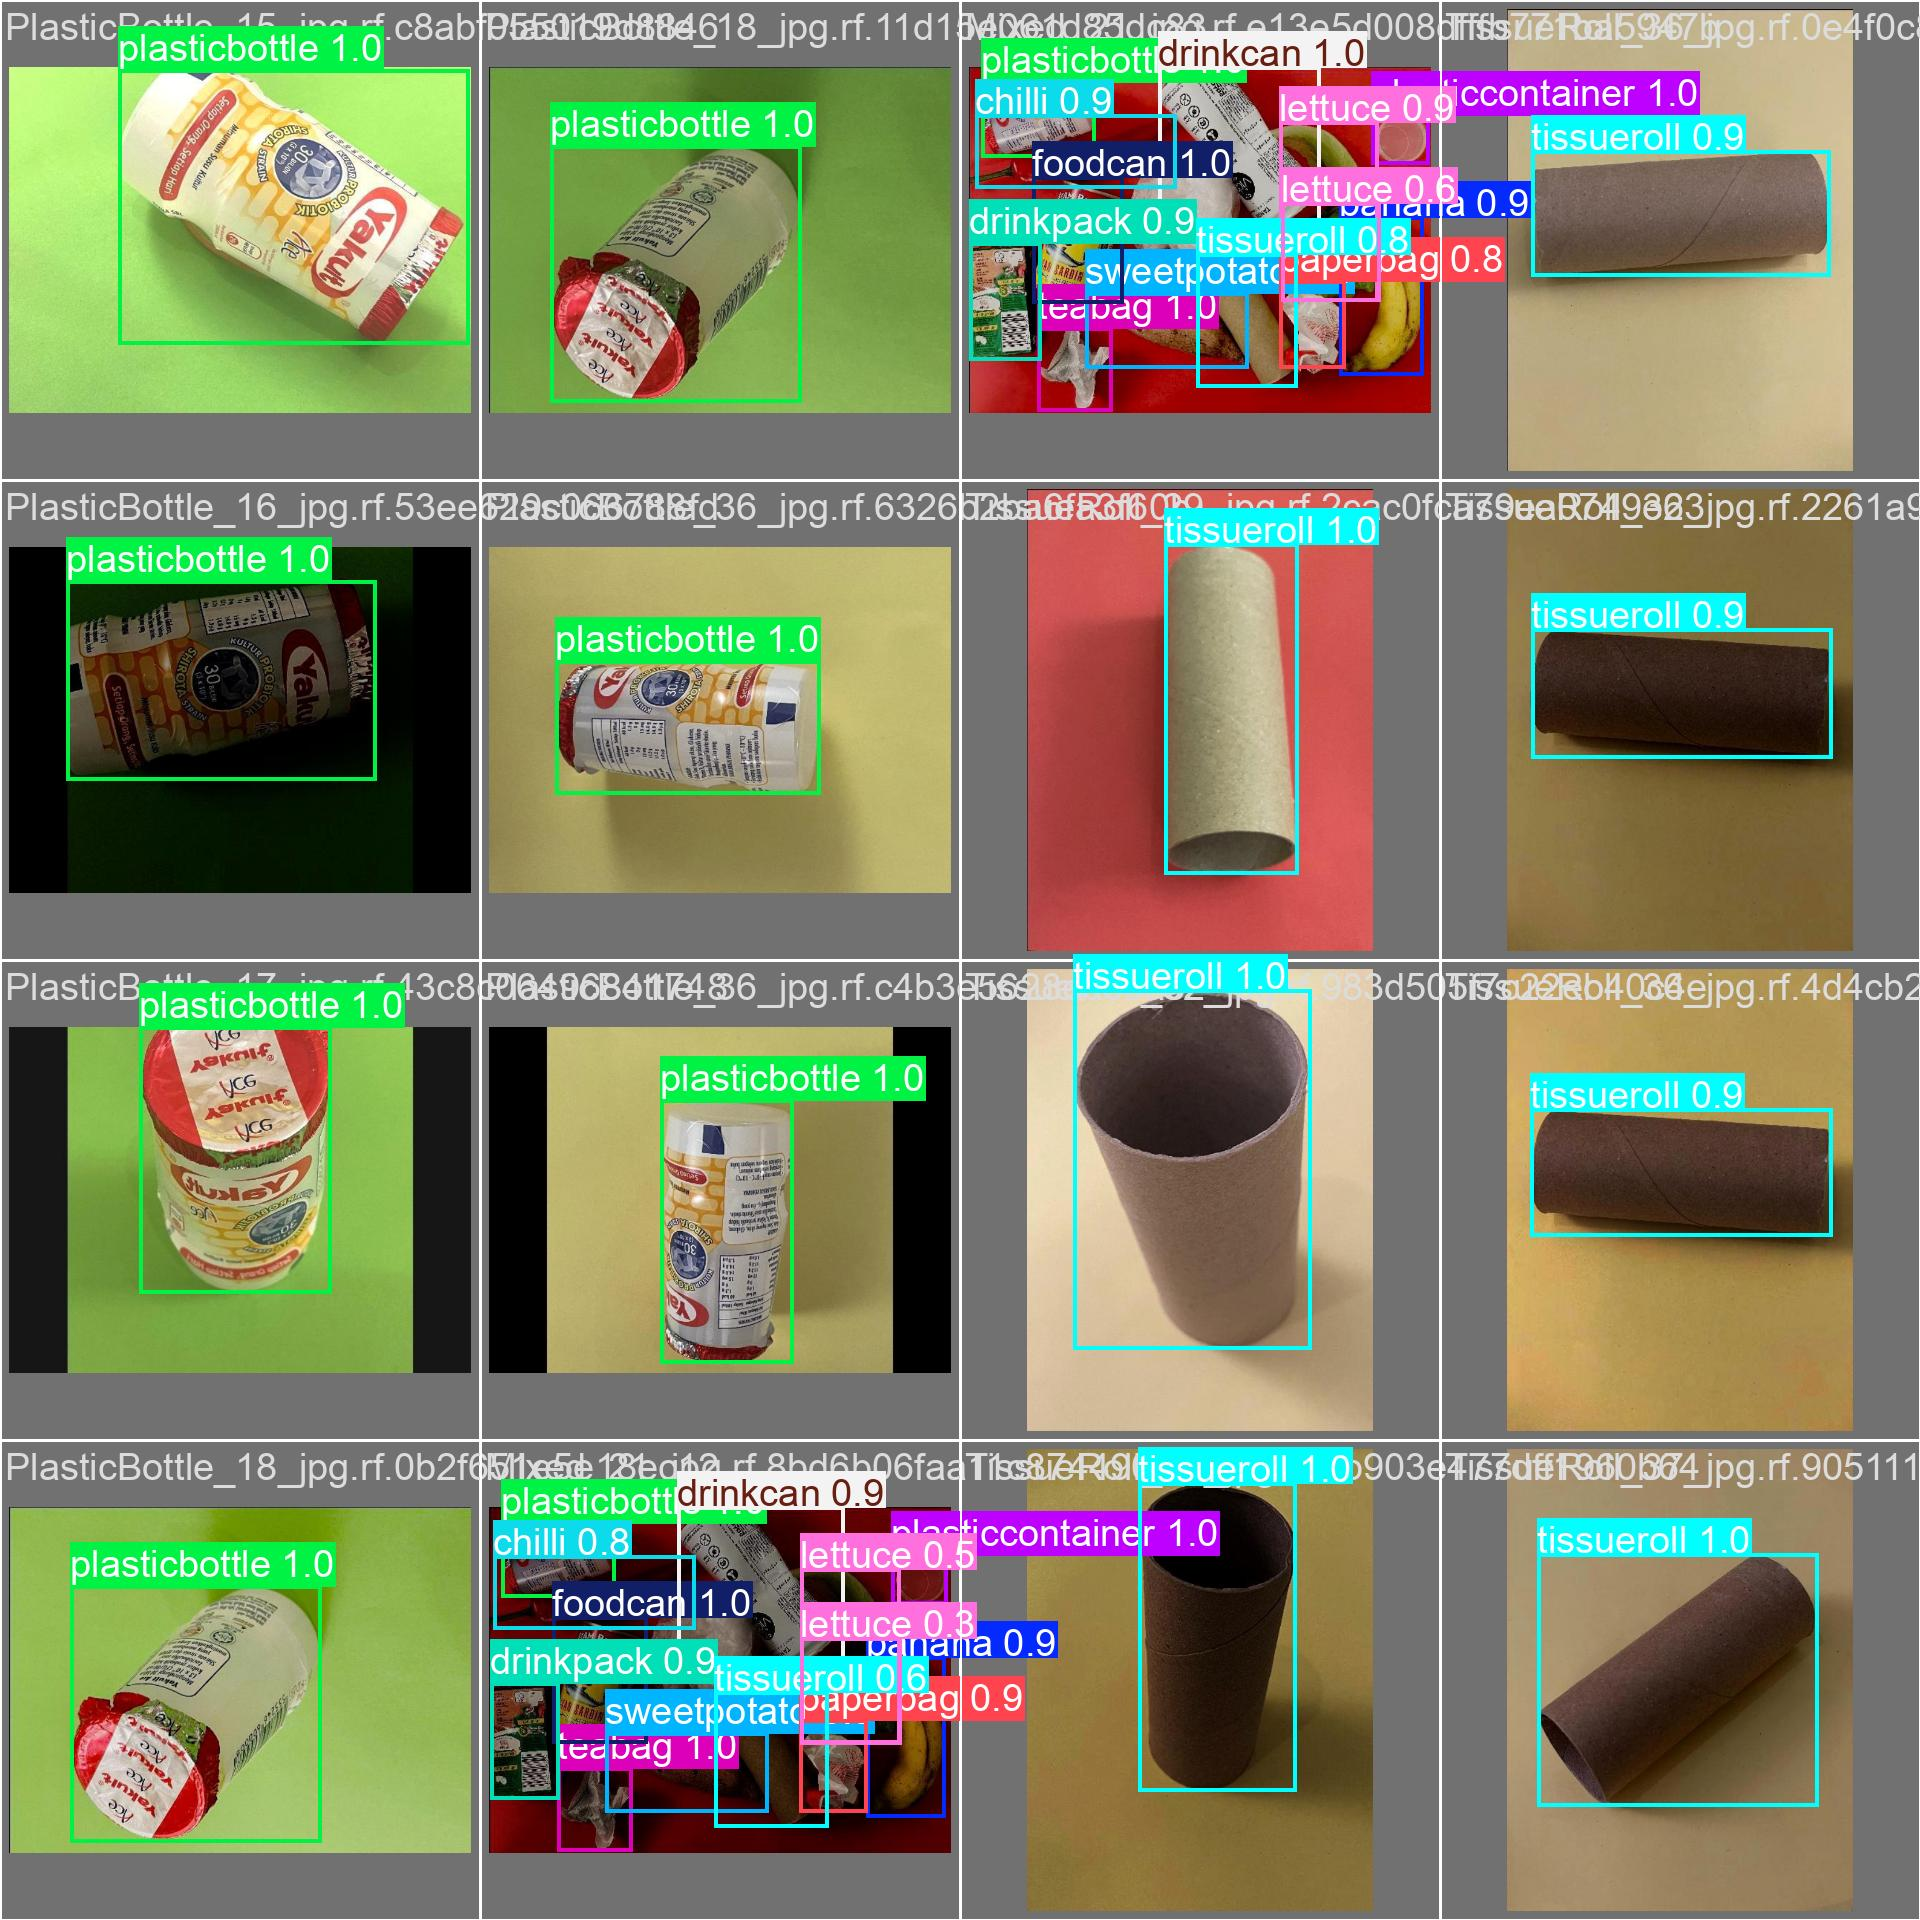

In [34]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=800)

In [35]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/valid/labels.cache... 459 images, 0 backgrounds, 0 corrupt: 100% 459/459 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 29/29 [00:08<00:00,  3.31it/s]
                   all        459        702      0.968      0.967      0.982      0.935
                banana         46         46      0.988      0.978      0.994       0.94
                chilli         55         55      0.948          1      0.962      0.901
              drinkcan         49         49      0.955          1      0.995      0.972
             drinkpack         51         51          1      0.988      0.995      0.966
               foodcan         46         46        0.9          1      0.974      0.952
               lettuce         47         57   

In [36]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 831, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 555, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 183, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 36, in generator_context
    response = gen.send(None)
  File "/usr/loc

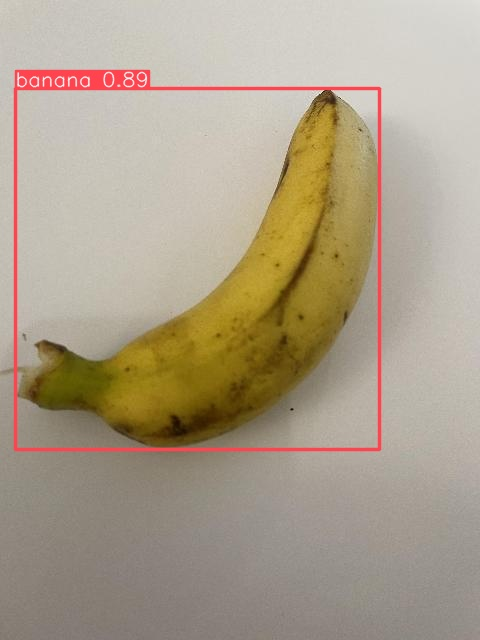

In [37]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [40]:
!pip install ultralytics==8.0.196
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.103
    Uninstalling ultralytics-8.2.103:
      Successfully uninstalled ultralytics-8.2.103


Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`


KeyboardInterrupt: Interrupted by user